In [1]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using StatsPlots

## Boxplot

In [9]:
data = CSV.read("NYC_SPARCS_cancer.csv", DataFrame)

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID
,String,String,Int64,Int64
1,New York City,Bronx,7000002,1165
2,New York City,Bronx,7000002,1165
3,New York City,Bronx,7000002,1165
4,New York City,Bronx,7000002,1165
5,New York City,Bronx,7000002,1165
6,New York City,Bronx,7000002,1165
7,New York City,Bronx,7000002,1165
8,New York City,Bronx,7000002,1165
9,New York City,Bronx,7000002,1165


In [10]:
rename!(data, "Hospital County" => :County)
rename!(data, [i => replace(string(i), " "=>"_") |> Symbol for i in names(data)])
rename!(data, "Zip_Code_-_3_digits" => :Zip_Code)
data[:Facility_ID] = string.(data[:Facility_ID])
# data[:CCS_Diagnosis_Code] = string.(data[:CCS_Diagnosis_Code])
print("done")

done

In [11]:
pyplot()   # good plotting tool for saving pdf figures

Plots.PyPlotBackend()

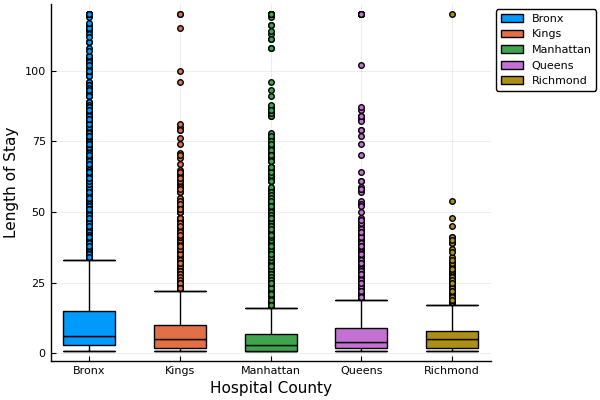

In [12]:
@df data boxplot(:County, :Length_of_Stay, group=:County, legend=:outertopright)
xlabel!("Hospital County")
ylabel!("Length of Stay")

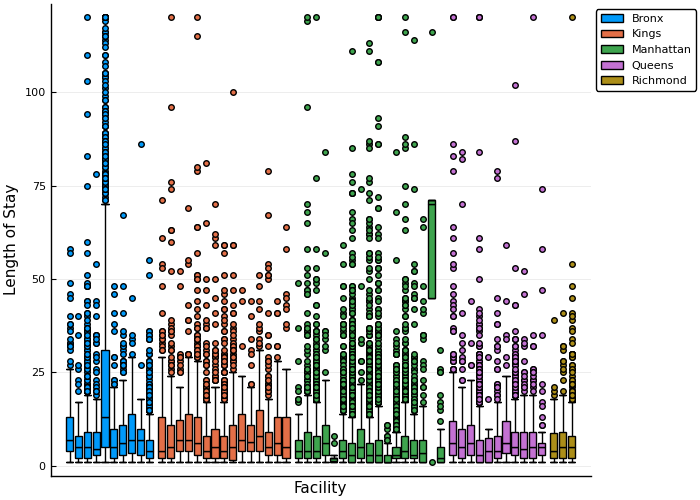

In [13]:
@df data boxplot(:Facility_ID, :Length_of_Stay, group=:County, legend=:outertopright, 
    xticks=false, xrotation = 90, size = (700, 500))
xlabel!("Facility")
ylabel!("Length of Stay")

In [14]:
data_m = data[(data[:County].=="Bronx"),:]

,Health_Service_Area,County,Operating_Certificate_Number,Facility_ID,Facility_Name
,String,String,Int64,String,String
1,New York City,Bronx,7000002,1165,Jacobi Medical Center
2,New York City,Bronx,7000002,1165,Jacobi Medical Center
3,New York City,Bronx,7000002,1165,Jacobi Medical Center
4,New York City,Bronx,7000002,1165,Jacobi Medical Center
5,New York City,Bronx,7000002,1165,Jacobi Medical Center
6,New York City,Bronx,7000002,1165,Jacobi Medical Center
7,New York City,Bronx,7000002,1165,Jacobi Medical Center
8,New York City,Bronx,7000002,1165,Jacobi Medical Center
9,New York City,Bronx,7000002,1165,Jacobi Medical Center


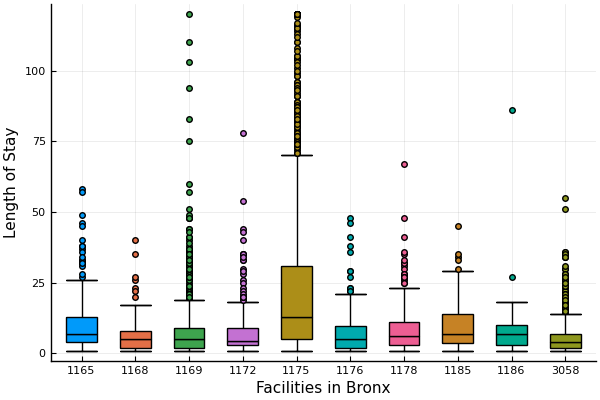

In [15]:
@df data_m boxplot(:Facility_ID, :Length_of_Stay, group=:Facility_ID, xticks=:all, legend=:none)
xlabel!("Facilities in Bronx")
ylabel!("Length of Stay")

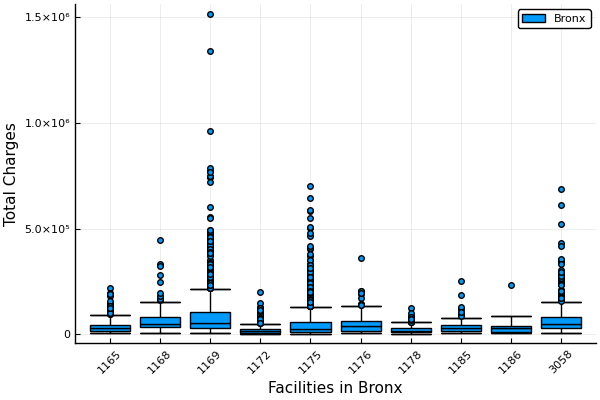

In [16]:
@df data_m boxplot(:Facility_ID, :Total_Charges, group=:County, xticks=:all, xrotation=45)
xlabel!("Facilities in Bronx")
ylabel!("Total Charges")

In [ ]:
# @df data boxplot(:CCS_Diagnosis_Code, :Length_of_Stay, group=:CCS_Diagnosis_Code, xticks=:all, legend=:outertopright)
# xlabel!("CCS_Diagnosis_Code")
# ylabel!("Length of Stay")

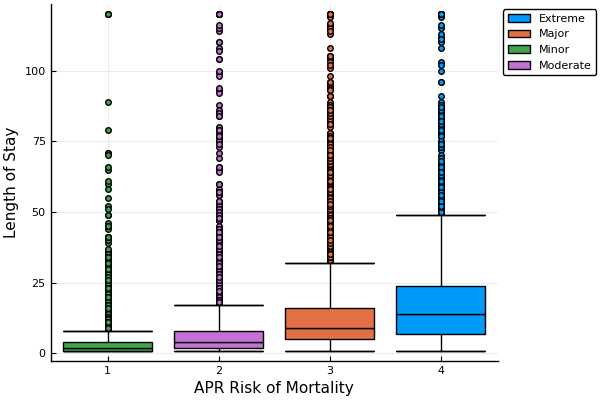

In [18]:
@df data boxplot(:APR_Risk_of_Mortality_Ordinal, :Length_of_Stay, group=:APR_Risk_of_Mortality, xticks=:all, legend=:outertopright)
xlabel!("APR Risk of Mortality")
ylabel!("Length of Stay")

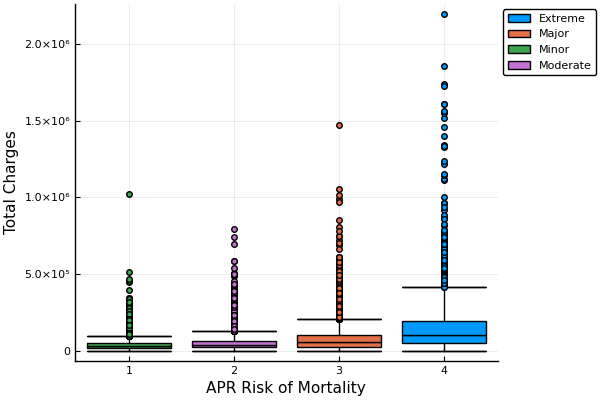

In [19]:
@df data boxplot(:APR_Risk_of_Mortality_Ordinal, :Total_Charges, group=:APR_Risk_of_Mortality, legend=:outertopright, xticks=:all, size=(600,400))
xlabel!("APR Risk of Mortality")
ylabel!("Total Charges")